In [3]:
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
merged_df = pd.read_csv("../data/merged_dataset_ver1.1.1.csv")

In [4]:
categorical_columns = ['code_module','code_presentation','id_student','gender','region','highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'disability', 'is_dropout']
numeric_columns = ['studied_credits', 'date_registration', 'date_unregistration', 'sum_click', 'avg_score', 'banked_ratio']
target = "target"  # index =17

categorical_columns_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 16]
numeric_columns_index = [9, 11, 12, 13, 14, 15]

In [5]:
# 1. 결측치 직접 처리: date_unregistration → 9999
merged_df["date_unregistration"] = merged_df["date_unregistration"].fillna(9999)

# 1. 원래 컬럼 순서 저장
original_columns = merged_df.columns.tolist()

# 2. ColumnTransformer 설정
na_transformer = ColumnTransformer([
    ("category_imputer", SimpleImputer(strategy="most_frequent"), ['imd_band']),
    ("number_imputer", SimpleImputer(strategy="mean"), ['date_registration'])
], remainder="passthrough")

# 3. 처리 대상 및 passthrough 대상 정리
processed_columns = ['imd_band', 'date_registration']
passthrough_columns = [col for col in merged_df.columns if col not in processed_columns]

# 4. fit_transform 적용
na_values_array = na_transformer.fit_transform(merged_df)

# 5. DataFrame으로 변환 + 컬럼 순서 복원
na_values_df = pd.DataFrame(na_values_array, columns=processed_columns + passthrough_columns)
na_values_df = na_values_df[original_columns]  # 순서 복원!
na_values_df

X = na_values_df.drop(columns='target').values
y = na_values_df['target'].values

In [6]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10,16]),# feature의 index로 지정.   # index는 앞에 했던 배열로 적용해줘야함.
    ("number_scaler", StandardScaler(), [9,11,12,13,14,15])    #feature Scaling은 연속형끼리 같은 방식을 사용 (standard or MinMax 중 택1)
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
- Complete:6.30151초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.99229초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:5.63045초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:73.63039초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:16.44320초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:160.20113초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:2.78808초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:25.68992초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:18.95604초

 >>> Tuning Naive Bayes...
Fittin

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:28.69712초

=== Final Comparison ===
              Model                                                                                    Best Params  Train Accuracy (CV)  Test Accuracy
           LightGBM                                  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}             0.897680       0.899216
            XGBoost                                  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899408       0.898448
           CatBoost                                          {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}             0.900138       0.898295
Logistic Regression                                   {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'saga'}             0.882586       0.889077
                SVM                                    {'clf__C': 0.1, 'clf__gamma': 0.1, 'clf__kernel': 'linear'}             0.883508       0.888155
      SGDClassifier {'clf__alpha': 0.01, 'clf__

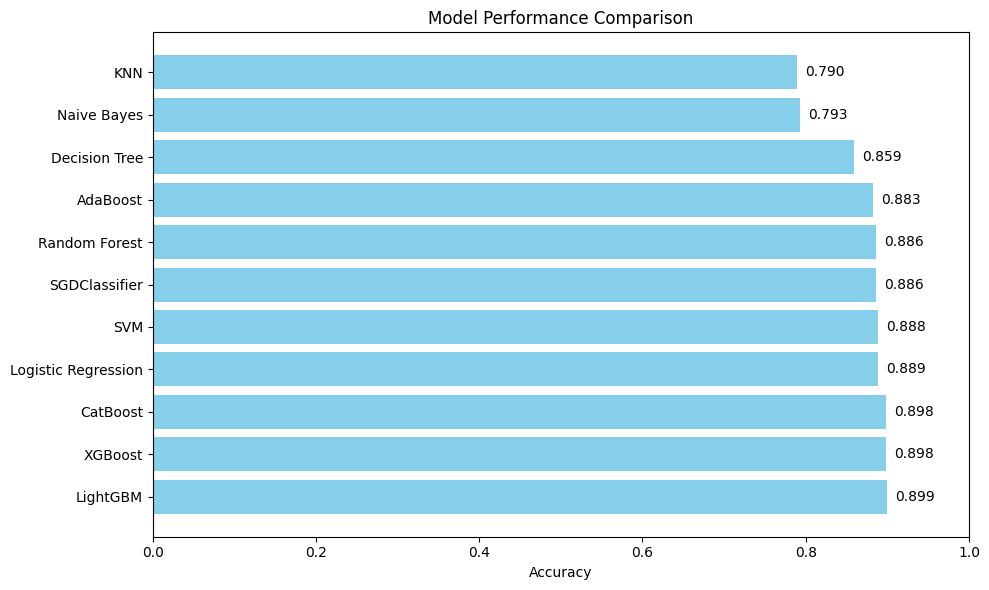


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3056
           1       0.92      0.80      0.86      3453

    accuracy                           0.86      6509
   macro avg       0.86      0.86      0.86      6509
weighted avg       0.87      0.86      0.86      6509



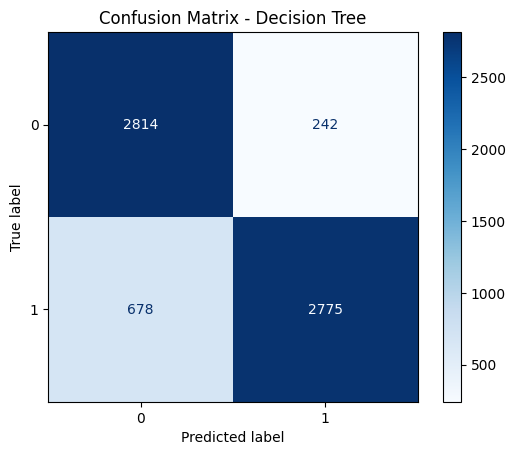


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3056
           1       0.95      0.83      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



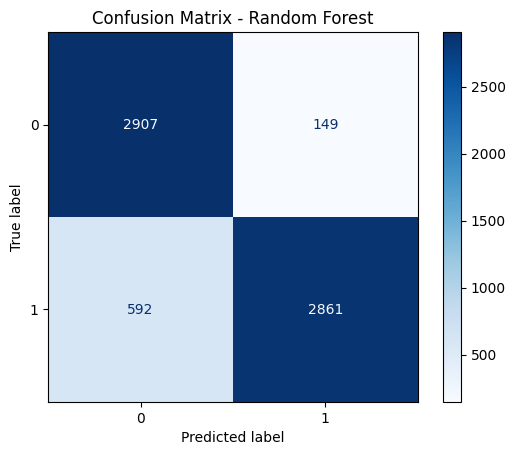


 KNN Best Model Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      3056
           1       0.85      0.73      0.79      3453

    accuracy                           0.79      6509
   macro avg       0.79      0.79      0.79      6509
weighted avg       0.80      0.79      0.79      6509



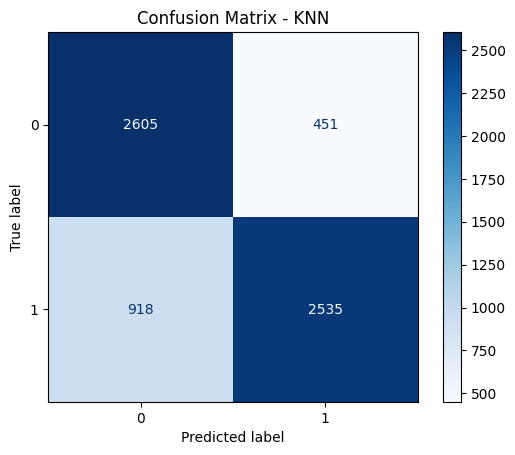


 SVM Best Model Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3056
           1       0.93      0.85      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



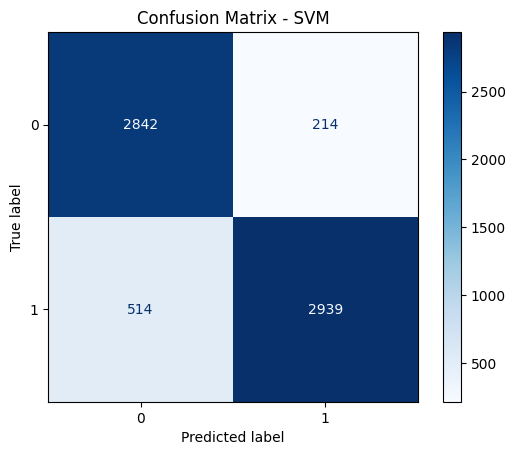


 XGBoost Best Model Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3056
           1       0.94      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



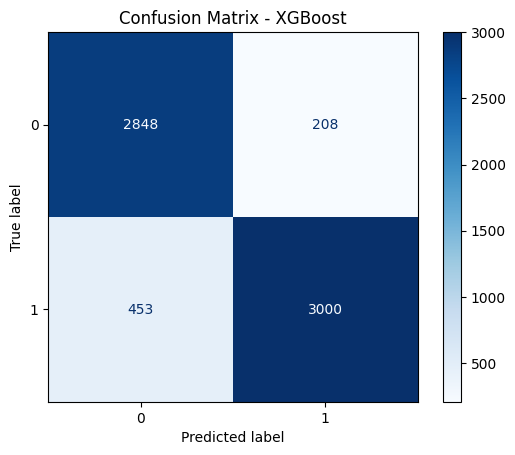


 Logistic Regression Best Model Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3056
           1       0.93      0.86      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



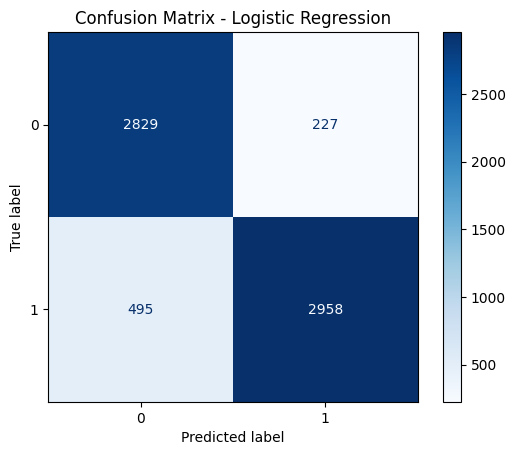


 SGDClassifier Best Model Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3056
           1       0.95      0.83      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.89      0.89      0.89      6509



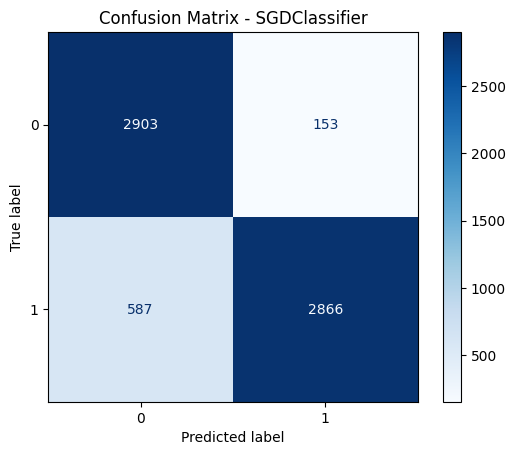


 AdaBoost Best Model Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3056
           1       0.92      0.85      0.88      3453

    accuracy                           0.88      6509
   macro avg       0.88      0.88      0.88      6509
weighted avg       0.89      0.88      0.88      6509



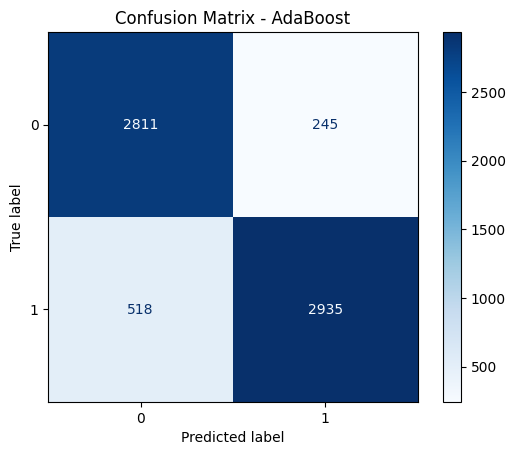


 CatBoost Best Model Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3056
           1       0.93      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



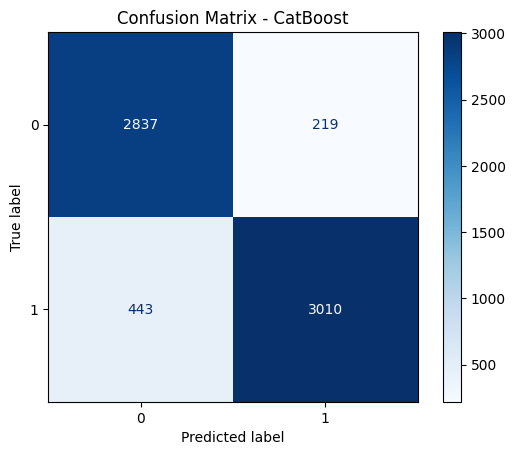


 Naive Bayes Best Model Report
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      3056
           1       0.98      0.62      0.76      3453

    accuracy                           0.79      6509
   macro avg       0.84      0.80      0.79      6509
weighted avg       0.85      0.79      0.79      6509



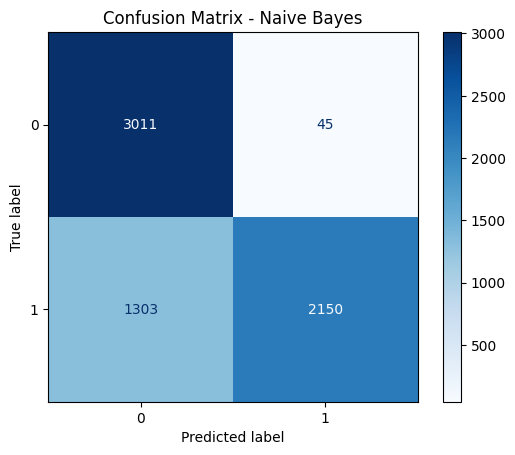


 LightGBM Best Model Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3056
           1       0.93      0.87      0.90      3453

    accuracy                           0.90      6509
   macro avg       0.90      0.90      0.90      6509
weighted avg       0.90      0.90      0.90      6509



c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


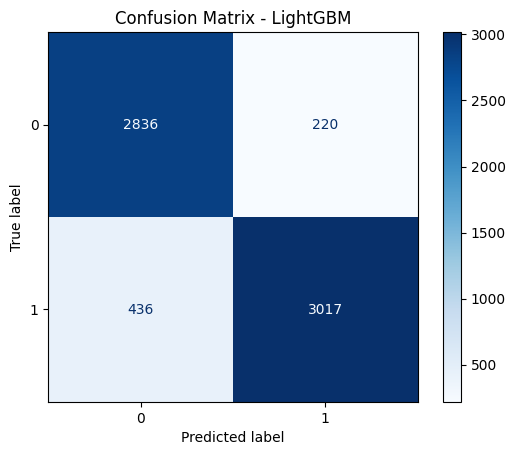

In [7]:
import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', SVC(random_state=42))
    ]),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', LogisticRegression(max_iter=5000, random_state=42))
    ]),
    "SGDClassifier": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', SGDClassifier(random_state=42))
    ]),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', GaussianNB())
    ]),
    "LightGBM": LGBMClassifier(random_state=42)
    # "MLPClassifier": Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('clf', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
    # ])
}

param_grids = {
    "Decision Tree": {
        "max_depth":range(1, 5),
        "max_leaf_nodes": [3, 5, 10],
        "min_samples_leaf": [2, 5, 10],
        "max_features": [1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50, 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'clf__n_neighbors':[3,5],
        'clf__weights': ['uniform', 'distance']},
    "SVM": {
        'clf__C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'clf__gamma': [0.1], #[0.01, 0.1, 1, 10],
        'clf__kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'clf__C': [ 0.1],  # 규제 강도
        'clf__penalty': [ 'l2'],  # 규제 유형
        'clf__solver': ['saga']},
    "SGDClassifier": {
        'clf__loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'clf__alpha': [ 0.01],  # 규제 계수
        'clf__learning_rate': ['adaptive'],
        'clf__eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.5, 1.0]
    },
    "CatBoost": {
        'iterations': [100],
        'depth': [4, 6],
        'learning_rate': [0.01, 0.1]
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50]
    }
    # "MLPClassifier": {
    #     'clf__hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'clf__activation': ['relu', 'tanh'],
    #     'clf__alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'clf__learning_rate_init': [0.001, 0.01],
    #     'clf__batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)